# Introduction

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
from sklearn import  preprocessing
import matplotlib.pylab as plt
train = pd.read_csv('D:/train.csv', header = 0, dtype={'Age': np.float64,'Cabin':str})
test= pd.read_csv('D:/test.csv',header=0,dtype={'Age':np.float64})
full_data = [train, test]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#counting the missing value
print(train.isnull().sum(0))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Feature Engineering

# 1. Pclass

there is no missing value on this feature and already a numerical value. so let's check it's impact on our train set.

In [4]:
train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=0).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# 2.sex

In [5]:
train[["Sex", "Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [6]:
train['Sex'].isnull().sum()

0

In [7]:
#enc=preprocessing.OneHotEncoder()
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# 2.Age

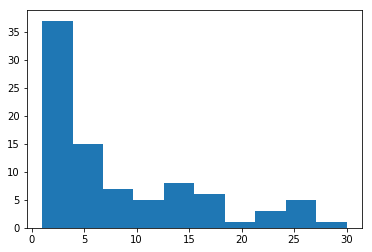

In [8]:
plt.hist(train['Age'].groupby(train['Age']).count())
plt.show()

In [9]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

    dataset['Age'] = dataset['Age'].astype(np.float64)
    


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
train['Age']=preprocessing.scale(train['Age'])

In [11]:
'''
        # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)
train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()
'''    

"\n        # Mapping Age\n    dataset.loc[ dataset['Age'] <= 16, 'Age'] \t\t\t\t\t       = 0\n    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1\n    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2\n    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3\n    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4\n    \ntrain['CategoricalAge'] = pd.cut(train['Age'], 5)\ntrain[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()\n"

# 3.SibSp and Parch

With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.

In [12]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


it seems has a good effect on our prediction but let's go further and categorize people to check whether they are alone in this ship or not.

In [13]:
#enc=preprocessing.OneHotEncoder()
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    #dataset['catagorical_IsAlone']=enc.fit_transform(dataset['IsAlone'])
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


good! the impact is considerable.

# 4. Embarked

In [14]:
train['Embarked'].groupby(train['Embarked']).count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

the embarked feature has some missing value. and we try to fill those with the most occurred value ( 'S' ).

In [15]:
enc=preprocessing.OneHotEncoder()
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    #dataset['catagorical_Embarked']=enc.fit_transform(dataset['Embarked'])
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
0,0.339009
1,0.553571
2,0.389610


# 5. Fare

Fare also has some missing value and we will replace it with the median. then we categorize it into 4 ranges.

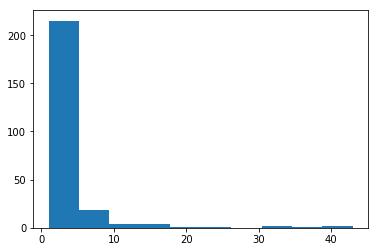

In [16]:
plt.hist(train['Fare'].groupby(train['Fare']).count())
plt.show()

In [17]:

for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].mean())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare']).mean()

,Survived
CategoricalFare,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [18]:
#enc=preprocessing.OneHotEncoder()
for dataset in full_data:
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    #dataset['catagorical_Fare']=enc.fit_transform(dataset['Fare'])

# 7. Name

inside this feature we can find the title of people.

In [19]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


so we have titles. let's categorize it and check the title impact on survival rate.

In [20]:
#enc=preprocessing.OneHotEncoder()
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    #dataset['catagorical_Tile']=enc.fit_transform(dataset['Title'])
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


# Ticket

# Data Cleaning

great! now let's clean our data and map our features into numerical values.

In [21]:
train['Cabin']=train['Cabin'].fillna('0')
test['Cabin']=test['Cabin'].fillna('0')

In [22]:
train['Cabin']=train['Cabin'].map(lambda x:x[0])
test['Cabin']=test['Cabin'].map(lambda x:x[0])

In [23]:
train['Survived'].groupby(train['Cabin']).mean()

Cabin
0    0.299854
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

In [24]:
for dataset in full_data:
    title_mapping = {'0': 0,'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}
    dataset['Cabin'] = dataset['Cabin'].map(title_mapping)

good! now we have a clean dataset and ready to predict. let's find which classifier works better on this dataset.

# DecisionTree

In [25]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

In [26]:
x=train[['Pclass','Sex','Age','Fare','Cabin','Embarked','IsAlone','Title']]
y=train['Survived']
test_x=test[['Pclass','Sex','Age','Fare','Cabin','Embarked','IsAlone','Title']]

accs=[]
clf=RandomForestClassifier()
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
for train_index, test_index in sss.split(x, y):
    X_train, X_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    accs.append(acc)
np.mean(accs)




0.80444444444444441

# Classifier Comparison

# Prediction

now we can use SVC classifier to predict our data.

In [27]:
clf.fit(x, y)
result = clf.predict(test_x)

In [41]:
import csv
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':result})
with open(r'D:\submission.csv','a') as f:
    f_csv=csv.writer(f,lineterminator='\n')
    f_csv.writerow(submission.columns)
    f_csv.writerows(submission.values)

In [42]:
submission.values

array([[ 892,    0],
       [ 893,    0],
       [ 894,    0],
       [ 895,    0],
       [ 896,    0],
       [ 897,    0],
       [ 898,    1],
       [ 899,    0],
       [ 900,    1],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    0],
       [ 910,    0],
       [ 911,    1],
       [ 912,    0],
       [ 913,    0],
       [ 914,    1],
       [ 915,    0],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    0],
       [ 920,    1],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    0],
       [ 925,    0],
       [ 926,    0],
       [ 927,    0],
       [ 928,    0],
       [ 929,    0],
       [ 930,    0],
       [ 931,    1],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,